In [28]:
import numpy as np 
import pandas as pd 

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D,Flatten
from keras.layers import MaxPool2D
import numpy
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [30]:
# IMPORTING DATASETS
Train_ds=tf.keras.utils.image_dataset_from_directory("./input/train",batch_size=32,image_size=(180,180),seed=56)
Test_ds=tf.keras.utils.image_dataset_from_directory("./input/test",batch_size=32,image_size=(180,180),seed=56)
Valid_ds=tf.keras.utils.image_dataset_from_directory("./input/valid",batch_size=32,image_size=(180,180),seed=56)
Class_Names=Train_ds.class_names
print(Class_Names)
for class_name in Class_Names:
    print(class_name)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'thre

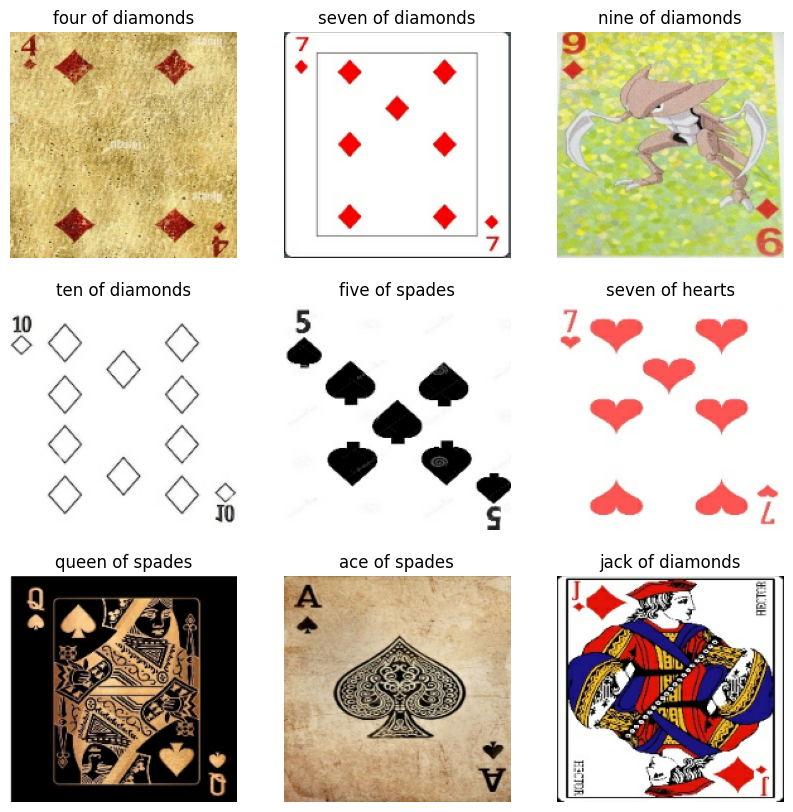

(32, 180, 180, 3)
(32,)


In [31]:
# HAVING A LOOK AT THE IMAGES OF TEST DATA

plt.figure(figsize=(10,10))
for images, labels in Test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(Class_Names[labels[i]])
        plt.axis("off")
plt.show()
for image_batch, labels_batch in Train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [32]:
# FAST PROCESSING
AUTOTUNE = tf.data.AUTOTUNE
Train_ds = Train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
Valid_ds = Valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes=len(Class_Names)

In [33]:
# BUILDING THE CNN,ANN MODEL
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(256,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [34]:
epochs_digit = 8
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model.summary())
history =model.fit(Train_ds,validation_data=Valid_ds,epochs=epochs_digit)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
print(acc,val_acc,loss,val_loss)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 45, 45, 64)       

 dropout_2 (Dropout)         (None, 5, 5, 256)         0         
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               819328    
                                                                 
 dense_5 (Dense)             (None, 53)                6837      
                                                                 
Total params: 1218773 (4.65 MB)
Trainable params: 1218773 (4.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/8
239/239 [==============================] - 108s 430ms/step - loss: 3.2864 - accuracy: 0.1512 - val_loss: 2.0273 - val_accuracy: 0.3962
Epoch 2/8
239/239 [==============================] - 102s 426ms/step - loss: 2.0103 - accuracy: 0.4285 - val_loss: 1.3123 - val_accuracy: 0.6151
Epoch 3

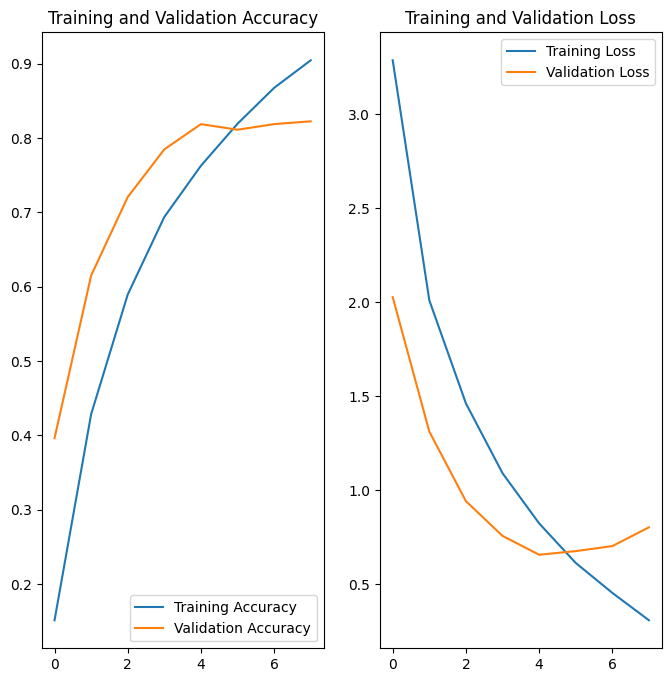

In [35]:
epochs_range = range(epochs_digit)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()